<a href="https://colab.research.google.com/github/varsha-shastri/covid-growth-analysis/blob/master/Covid_growth_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fbprophet import Prophet
from sklearn.metrics import r2_score

plt.style.use("ggplot")


In [3]:
df0 = pd.read_csv("/content/drive/MyDrive/CONVENIENT_global_confirmed_cases.csv")
df0.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,Australia.2,Australia.3,Australia.4,Australia.5,Australia.6,Australia.7,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,...,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,United Kingdom.7,United Kingdom.8,United Kingdom.9,United Kingdom.10,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,"Saint Helena, Ascension and Tristan da Cunha",Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/CONVENIENT_global_deaths.csv")
df1.tail()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,Australia.2,Australia.3,Australia.4,Australia.5,Australia.6,Australia.7,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,...,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,United Kingdom.7,United Kingdom.8,United Kingdom.9,United Kingdom.10,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
525,6/30/21,77.0,0.0,8.0,0.0,6.0,0.0,636.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,115.0,0.0,11.0,3.0,0.0,0.0,0.0,65.0,2.0,0.0,2081.0,0.0,12.0,0.0,14.0,0.0,0.0,27.0,0.0,...,0.0,0.0,6.0,3.0,4.0,3.0,5.0,0.0,0.0,53.0,1.0,0.0,14.0,116.0,45.0,240.0,34.0,50.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,35.0,3.0,0.0,35.0,1.0,2.0,0.0,61.0,28.0
526,7/1/21,91.0,0.0,10.0,0.0,3.0,0.0,468.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,143.0,0.0,10.0,7.0,0.0,0.0,0.0,55.0,2.0,33.0,2029.0,0.0,6.0,0.0,13.0,0.0,1.0,26.0,0.0,...,6.0,0.0,9.0,1.0,3.0,3.0,13.0,0.0,0.0,57.0,1.0,1.0,10.0,106.0,42.0,305.0,38.0,63.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,26.0,4.0,0.0,17.0,0.0,2.0,0.0,72.0,19.0
527,7/2/21,0.0,0.0,9.0,0.0,3.0,0.0,610.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,3.0,132.0,0.0,11.0,5.0,1.0,0.0,0.0,57.0,0.0,0.0,1857.0,0.0,16.0,0.0,17.0,0.0,0.0,32.0,0.0,...,0.0,0.0,8.0,1.0,0.0,3.0,15.0,0.0,0.0,61.0,0.0,0.0,9.0,114.0,55.0,394.0,50.0,43.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,23.0,2.0,0.0,18.0,3.0,5.0,0.0,70.0,33.0
528,7/3/21,0.0,0.0,10.0,0.0,4.0,0.0,212.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,134.0,0.0,11.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,1635.0,0.0,1.0,0.0,20.0,0.0,0.0,36.0,0.0,...,0.0,0.0,2.0,0.0,0.0,3.0,10.0,2.0,0.0,41.0,0.0,0.0,13.0,82.0,45.0,80.0,0.0,48.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,21.0,3.0,0.0,19.0,0.0,0.0,0.0,56.0,18.0
529,7/4/21,0.0,0.0,10.0,0.0,3.0,0.0,310.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,153.0,0.0,10.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,830.0,0.0,0.0,0.0,35.0,0.0,1.0,24.0,0.0,...,0.0,0.0,4.0,0.0,0.0,2.0,2.0,1.0,0.0,44.0,0.0,1.0,13.0,116.0,0.0,33.0,0.0,23.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,26.0,2.0,0.0,17.0,2.0,3.0,0.0,46.0,19.0


In [6]:
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = df0.iloc[:,1:].columns
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(df0[i][1:]).sum())
world["Cases"]=cases

country_list=list(world["Country"].values)
x = 0
for i in country_list:
    a = 0
    for j in i:
        if j==".":
            i = i[:a]
            country_list[x]=i
        elif j=="(":
            i = i[:a-1]
            country_list[x]=i
        else:
            a += 1
    x += 1
world["Country"]=country_list
world = world.groupby("Country")["Cases"].sum().reset_index()
world.head()

,Country,Cases
0,Afghanistan,120216.0
1,Albania,132535.0
2,Algeria,141471.0
3,Andorra,13918.0
4,Angola,39230.0


In [7]:
continent=pd.read_csv("/content/drive/MyDrive/continents2.csv")
continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [8]:
world["Cases Range"] = pd.cut(world["Cases"],[-150000,50000,200000,800000,1500000,15000000],labels=["U50K","50Kto200K","200Kto800K","800Kto1.5M","1.5M+"])
alpha =[]
for i in world["Country"].values:
     if i == "Brunei":
        i="Brunei Darussalam"
     elif  i=="US":
        i="United States"
   
     if  len(continent[continent["name"]==i]["alpha-3"].values)==0:
        alpha.append(np.nan)
     else:
      alpha.append(continent[continent["name"]==i]["alpha-3"].values[0])
world["Alpha3"]=alpha
world

,Country,Cases,Cases Range,Alpha3
0,Afghanistan,120216.0,50Kto200K,AFG
1,Albania,132535.0,50Kto200K,ALB
2,Algeria,141471.0,50Kto200K,DZA
3,Andorra,13918.0,U50K,AND
4,Angola,39230.0,U50K,AGO
...,...,...,...,...
189,Vietnam,20261.0,U50K,VNM
190,West Bank and Gaza,314569.0,200Kto800K,NaN
191,Yemen,6929.0,U50K,YEM
192,Zambia,164282.0,50Kto200K,ZMB


In [10]:

fig = px.choropleth(world.ffill(),
                    locations= "Alpha3",
                    color= "Cases",  
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',
                   projection="natural earth"
                   )

fig.show()

In [11]:
count = []
for i in range(1,len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = df0["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")
df.tail()

,Cases
Date,
6/30/21,391839.0
7/1/21,439021.0
7/2/21,442947.0
7/3/21,375056.0
7/4/21,282641.0


In [12]:
count = []
for i in range(1,len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i,1:].values)))
df["Deaths"] = count
df.tail()

,Cases,Deaths
Date,,
6/30/21,391839.0,9152.0
7/1/21,439021.0,8659.0
7/2/21,442947.0,8198.0
7/3/21,375056.0,6842.0
7/4/21,282641.0,5616.0


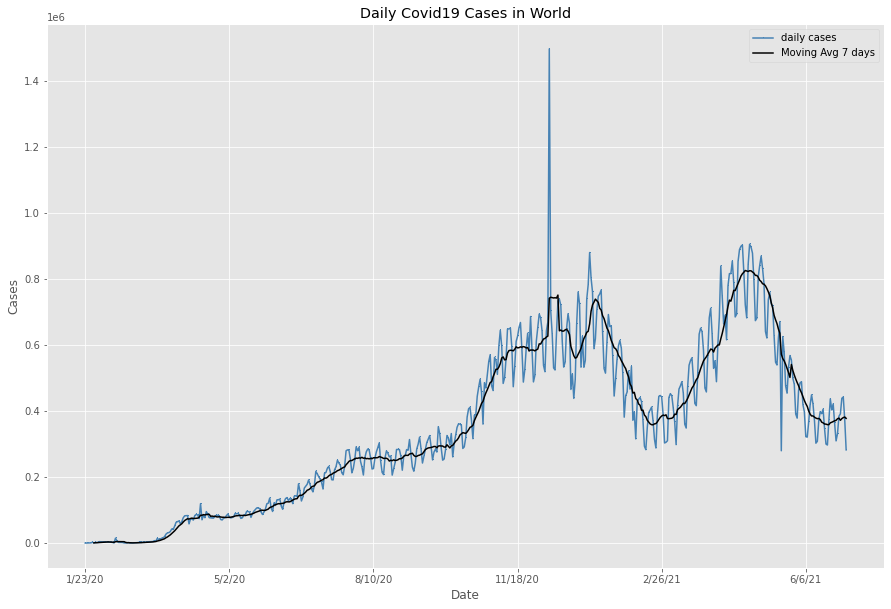

In [13]:
df.Cases.plot(title="Daily Covid19 Cases in World",marker=",",figsize=(15,10),label="daily cases", color="steelblue")
df.Cases.rolling(window=7).mean().plot(figsize=(15,10),label="Moving Avg 7 days",color="black")
plt.ylabel("Cases")
plt.legend()
cases = plt.show()

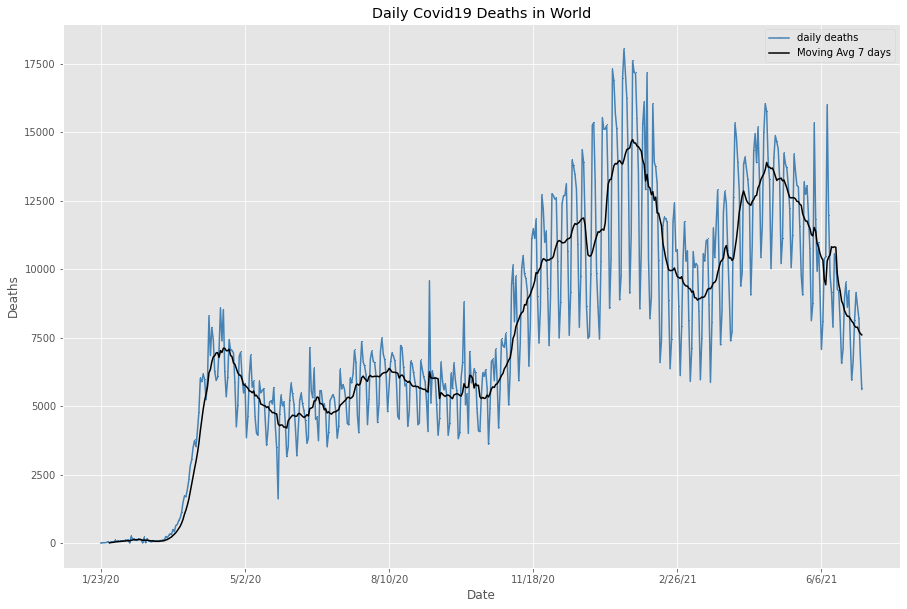

In [14]:
df.Deaths.plot(title="Daily Covid19 Deaths in World",marker=",",figsize=(15,10),label="daily deaths", color="steelblue")
df.Deaths.rolling(window=7).mean().plot(figsize=(15,10),label="Moving Avg 7 days", color="black")
plt.ylabel("Deaths")
plt.legend()
deaths = plt.show()

In [15]:
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values
df_fb.tail()


,ds,y
524,2021-06-30,391839.0
525,2021-07-01,439021.0
526,2021-07-02,442947.0
527,2021-07-03,375056.0
528,2021-07-04,282641.0


In [16]:
model =Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=True)
model.fit(df_fb)
future = model.make_future_dataframe(periods=30) 
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,ds
554,2021-07-30
555,2021-07-31
556,2021-08-01
557,2021-08-02
558,2021-08-03


In [17]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
554,2021-07-30,468285.699956,369719.200788,553854.356909
555,2021-07-31,430412.306944,342880.952524,514455.405587
556,2021-08-01,377513.295426,285763.456075,470565.386617
557,2021-08-02,379673.614410,284414.905973,467091.190178
558,2021-08-03,428883.123770,338345.746831,517663.709697


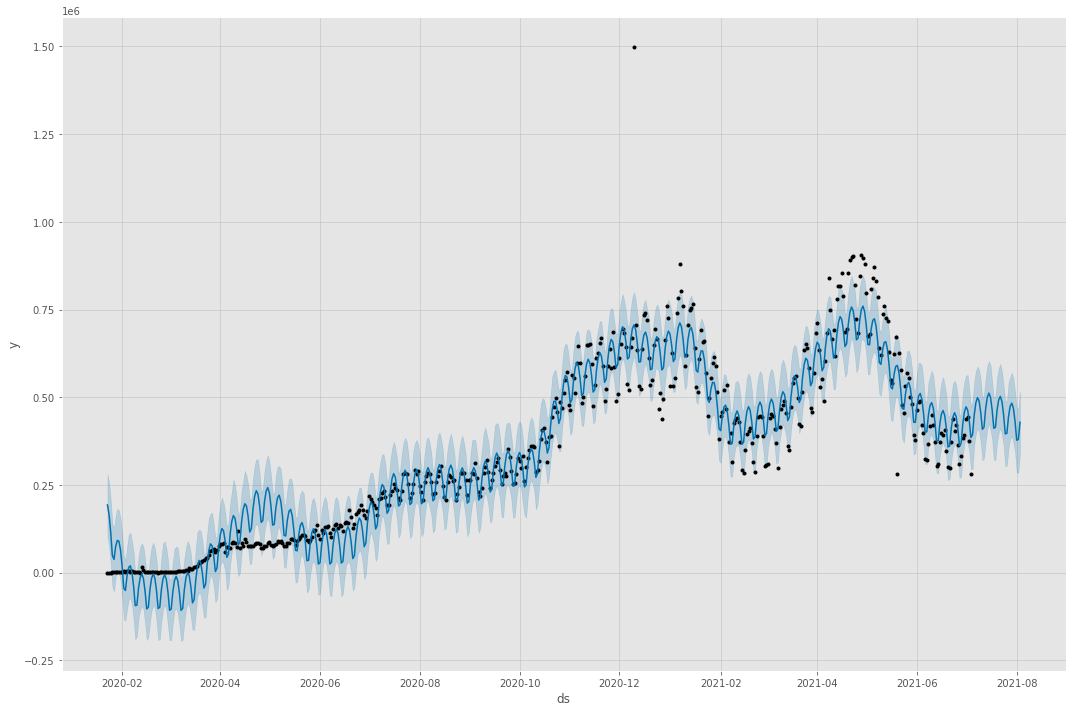

In [18]:
confirmed_forecast_plot = model.plot(forecast,figsize=(15,10))

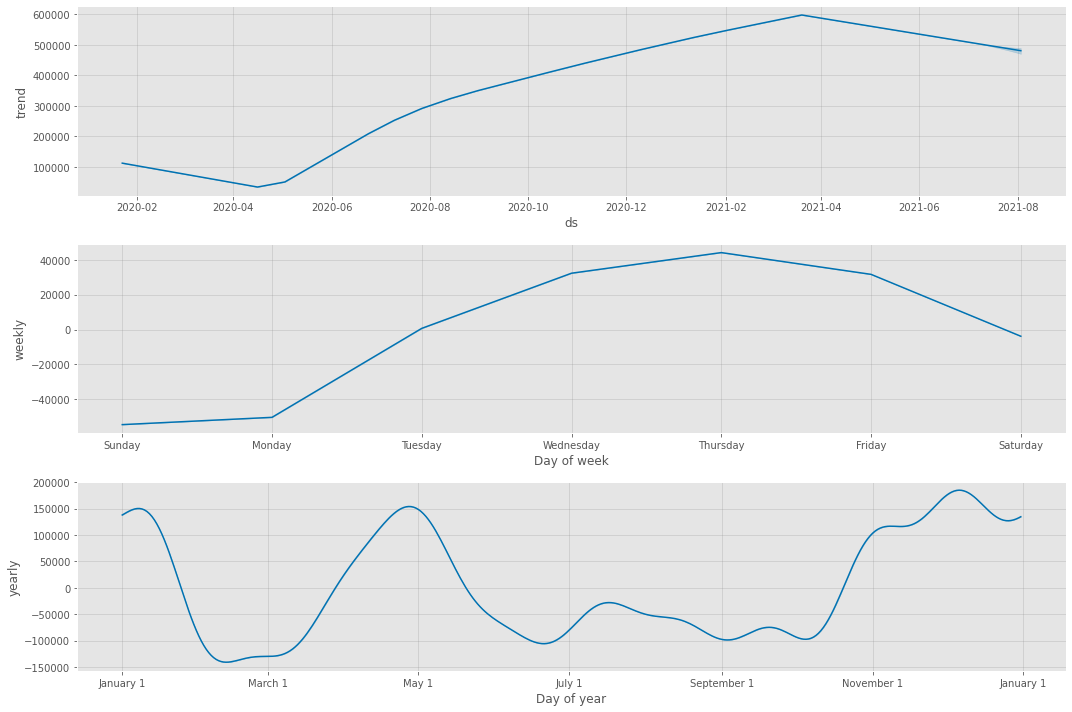

In [19]:
confirmed_forecast_plot1 =model.plot_components(forecast,figsize=(15,10))

In [20]:
def R2():
  return r2_score(df_fb.y, forecast.yhat[:len(df)])
R2()

0.918291175435354